In [1]:
import numpy as np
import pandas as pd

Функция активации $sig(x)=\frac{1}{1+exp^{-x}}$:

In [2]:
def sigmoid(x):
     return 1/(1+np.exp(-x))

In [3]:
def deriv(x): # Частная производная
     return x*(1-x)

In [4]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Удаление лишних данных

In [6]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
data_test = data_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
data_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
data_train.Age[data_train.Age.isnull()] = data_train.Age.median()

<ipython-input-8-e1cb12235975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.Age[data_train.Age.isnull()] = data_train.Age.median()


In [9]:
data_train.Embarked.max

<bound method Series.max of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [10]:
data_train.Embarked[data_train.Embarked.isnull()] = 'S'

<ipython-input-10-bf4654e7f57c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train.Embarked[data_train.Embarked.isnull()] = 'S'


In [11]:
data_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
data_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [13]:
data_test.Age[data_test.Age.isnull()] = data_test.Age.median()

<ipython-input-13-0189ae0f4ffd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.Age[data_test.Age.isnull()] = data_test.Age.median()


In [14]:
data_test.Fare[data_test.Fare.isnull()] = data_test.Fare.median()

<ipython-input-14-3e4f3cfdda6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.Fare[data_test.Fare.isnull()] = data_test.Fare.median()


In [15]:
data_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Нормализация данных

In [16]:
A = np.array(data_train['Pclass'])
B = np.array(data_train['Sex'])
C = np.array(data_train['Age'])
D = np.array(data_train['SibSp'])
E = np.array(data_train['Parch'])
F = np.array(data_train['Fare'])

In [17]:
print(A)
A = A/3
print(A)
A = A.astype(float)
print(A)

[3 1 3 1 3 3 1 3 3 2 3 1 3 3 3 2 3 2 3 3 2 2 3 1 3 3 3 1 3 3 1 1 3 2 1 1 3
 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 1 2 1 1 2 3 2 3 3 1 1 3 1 3 2 3 3 3 2 3 2 3
 3 3 3 3 2 3 3 3 3 1 2 3 3 3 1 3 3 3 1 3 3 3 1 1 2 2 3 3 1 3 3 3 3 3 3 3 1
 3 3 3 3 3 3 2 1 3 2 3 2 2 1 3 3 3 3 3 3 3 3 2 2 2 1 1 3 1 3 3 3 3 2 2 3 3
 2 2 2 1 3 3 3 1 3 3 3 3 3 2 3 3 3 3 1 3 1 3 1 3 3 3 1 3 3 1 2 3 3 2 3 2 3
 1 3 1 3 3 2 2 3 2 1 1 3 3 3 2 3 3 3 3 3 3 3 3 3 1 3 2 3 2 3 1 3 2 1 2 3 2
 3 3 1 3 2 3 2 3 1 3 2 3 2 3 2 2 2 2 3 3 2 3 3 1 3 2 1 2 3 3 1 3 3 3 1 1 1
 2 3 3 1 1 3 2 3 3 1 1 1 3 2 1 3 1 3 2 3 3 3 3 3 3 1 3 3 3 2 3 1 1 2 3 3 1
 3 1 1 1 3 3 3 2 3 1 1 1 2 1 1 1 2 3 2 3 2 2 1 1 3 3 2 2 3 1 3 2 3 1 3 1 1
 3 1 3 1 1 3 1 2 1 2 2 2 2 2 3 3 3 3 1 3 3 3 3 1 2 3 3 3 2 3 3 3 3 1 3 3 1
 1 3 3 1 3 1 3 1 3 3 1 3 3 1 3 2 3 2 3 2 1 3 3 1 3 3 3 2 2 2 3 3 3 3 3 2 3
 2 3 3 3 3 1 2 3 3 2 2 2 3 3 3 3 3 3 3 2 2 3 3 1 3 2 3 1 1 3 2 1 2 2 3 3 2
 3 1 2 1 3 1 2 3 1 1 3 3 1 1 2 3 1 3 1 2 3 3 2 1 3 3 3 3 2 2 3 1 2 3 3 3 3
 2 3 3 1 3 1 1 3 3 3 3 1 

In [18]:
print(B)
for i in range(len(B)):
    if B[i] == 'male':
        B[i]= 1
    elif B[i] == 'female':
        B[i]= 0
        
print(B)

B = B.astype(float)

['male' 'female' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'female' 'female' 'female' 'male' 'male' 'female' 'female' 'male' 'male'
 'female' 'female' 'male' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'female'
 'male' 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'male'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'ma

In [19]:
print(C)
mx=C.max()
C = C/mx
print(C)
C = C.astype(float)
print(C)

[22.   38.   26.   35.   35.   28.   54.    2.   27.   14.    4.   58.
 20.   39.   14.   55.    2.   28.   31.   28.   35.   34.   15.   28.
  8.   38.   28.   19.   28.   28.   40.   28.   28.   66.   28.   42.
 28.   21.   18.   14.   40.   27.   28.    3.   19.   28.   28.   28.
 28.   18.    7.   21.   49.   29.   65.   28.   21.   28.5   5.   11.
 22.   38.   45.    4.   28.   28.   29.   19.   17.   26.   32.   16.
 21.   26.   32.   25.   28.   28.    0.83 30.   22.   29.   28.   28.
 17.   33.   16.   28.   23.   24.   29.   20.   46.   26.   59.   28.
 71.   23.   34.   34.   28.   28.   21.   33.   37.   28.   21.   28.
 38.   28.   47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.
 21.   28.   32.5  32.5  54.   12.   28.   24.   28.   45.   33.   20.
 47.   29.   25.   23.   19.   37.   16.   24.   28.   22.   24.   19.
 18.   19.   27.    9.   36.5  42.   51.   22.   55.5  40.5  28.   51.
 16.   30.   28.   28.   44.   40.   26.   17.    1.    9.   28.   45.
 28.  

In [20]:
print(D)
mx=D.max()
D = D/mx
print(C)
D = D.astype(float)
print(D)

[1 1 0 1 0 0 0 3 0 1 1 0 0 1 0 0 4 0 1 0 0 0 0 0 3 1 0 3 0 0 0 1 0 0 1 1 0
 0 2 1 1 1 0 1 0 0 1 0 2 1 4 0 1 1 0 0 0 0 1 5 0 0 1 3 0 1 0 0 4 2 0 5 0 1
 0 0 0 0 0 0 0 0 0 0 0 3 1 0 3 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 4 2 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 2
 0 0 0 1 0 0 0 0 0 0 0 8 0 0 0 0 4 0 0 1 0 0 0 4 1 0 0 1 3 0 0 0 8 0 4 2 0
 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 8 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 3 1 0 0 4 0 0 1 0 0 0 1 1 0 0 0 2 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 4 1 0 0 0 4 1 0 0 0 0 0 0 0 1 0 0 4 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 2 0 0 0 1 0 1 1 0 0 2 1 0 1 0 1 0 0 1 0 0 0 1 8 0 0 0 1 0 2 0 0
 2 1 0 1 0 0 0 1 3 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 0 3 1 0 0 0 0 0 0 0 1 0 0 5 0 0 0 1 0 2 1 0 0 0 0 0 0 0 0 1 1 0 1 0
 1 0 3 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 2 2 1 0 1 0 1 0
 0 0 0 0 2 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 1 1 0 0 5
 0 0 0 1 3 1 0 0 1 1 0 0 

In [21]:
print(E)
mx=E.max()
E = E/mx
print(C)
E = E.astype(float)
print(E)

[0 0 0 0 0 0 0 1 2 0 1 0 0 5 0 0 1 0 0 0 0 0 0 0 1 5 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 1 0 0 0 2 2 0 0 0 2 0 1 0 0 2 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 3 0 2 0 0 0 0 2 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 2 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 1 0 2
 2 0 0 0 0 2 0 1 0 0 0 2 1 0 0 0 1 2 1 4 0 0 0 1 1 0 0 1 1 0 0 0 2 0 2 1 2
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 1 0 0 1 0 0 2 2 0 0 0
 1 0 2 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 1 0 0 0 0 0 2 0 0 0 0 0 2 1 0 1 0 0 0 2 1 0 0 0 1 2 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 4 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 2 0 2 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 2 2 3 4 0 1 0 0 0
 0 2 1 0 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 1 2
 0 0 0 0 1 0 0 0 1 0 0 0 

In [22]:
print(F)
mx=F.max()
F = F/mx
print(C)
F = F.astype(float)
print(F)

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.       7.8958  41.5792   7.8792   8.05    15.5      7.75
  21.6792  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5
  10.5      7.2292  27.75    46.9      7.2292  80.      83.475   27.9
  27.7208  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9
  73.5     14.4542  56.4958   7.65     7.8958   8.05    29.      12.475
   9.       9.5      7.7875  47.1     10.5     15.85    34.375    8.05
 263.       8.05     8.05     7.8542  61.175   20.575    7.25     8.05
  34.6542  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542
   7.925    7.8958   7.65     7.775    7.8958  24.15    52.      14.4542
  

In [23]:
X = np.array([A,B,C,D,E,F]).T
X.shape

(891, 6)

In [24]:
Y =  np.array(data_train['Survived'])
Y = Y.astype(float)
Y.shape

(891,)

In [56]:
weights = 2*np.random.random((6,1))-1
print("Случайные веса:",weights)

Случайные веса: [[ 0.63869823]
 [ 0.33106925]
 [-0.92163587]
 [-0.73780225]
 [-0.26486545]
 [-0.56078573]]


In [57]:
epochs = 180
J_history = np.zeros(epochs).astype(float)
J = np.array

In [58]:
def train(X,Y,weights,alpha,epochs):
    min_err =1100000
    min_weights = weights
    epoch = 0
    for epoch in range(epochs):
        outputs = sigmoid(np.dot(X,weights)) #(891,1)
        mse = np.sqrt((outputs - Y)**2/len(Y)) #(891,1) массив квадратов ошибки
        rmse = mse.sum()/ len(Y) #средний квадрат ошибки
        J_history[epoch] = rmse

        adj = np.dot(X.T, alpha*mse*deriv(outputs.T)) #(6,891) * ((891,1)*(1,891)) = (6,891)
        adj = np.dot(adj, np.ones((891,6), dtype = int)) #(6,6) - подгон по размеру
        adj = np.dot(adj, np.ones((6,1), dtype = int)) #(6,1) - подгон по размеру
        
        if rmse > min_err: #прерывание иттераций при росте функции ошибки
            print("Ошибка пошла на рост")
           # break
        min_err = rmse
        print(f"{epoch} epoch: {rmse}")
        weights -= adj # (6,1) - (6,1)
        
    J = J_history[:epoch]
    print("Обучение закончилось")
    return J, epoch, outputs

In [59]:
J , epoch, outputs = train(X,Y,weights,0.01,epochs)

0 epoch: 15.375094605525517
1 epoch: 11.457431093955027
2 epoch: 11.457431093955027
3 epoch: 11.457431093955027
4 epoch: 11.457431093955027
5 epoch: 11.457431093955027
6 epoch: 11.457431093955027
7 epoch: 11.457431093955027
8 epoch: 11.457431093955027
9 epoch: 11.457431093955027
10 epoch: 11.457431093955027
11 epoch: 11.457431093955027
12 epoch: 11.457431093955027
13 epoch: 11.457431093955027
14 epoch: 11.457431093955027
15 epoch: 11.457431093955027
16 epoch: 11.457431093955027
17 epoch: 11.457431093955027
18 epoch: 11.457431093955027
19 epoch: 11.457431093955027
20 epoch: 11.457431093955027
21 epoch: 11.457431093955027
22 epoch: 11.457431093955027
23 epoch: 11.457431093955027
24 epoch: 11.457431093955027
25 epoch: 11.457431093955027
26 epoch: 11.457431093955027
27 epoch: 11.457431093955027
28 epoch: 11.457431093955027
29 epoch: 11.457431093955027
30 epoch: 11.457431093955027
31 epoch: 11.457431093955027
32 epoch: 11.457431093955027
33 epoch: 11.457431093955027
34 epoch: 11.45743109395

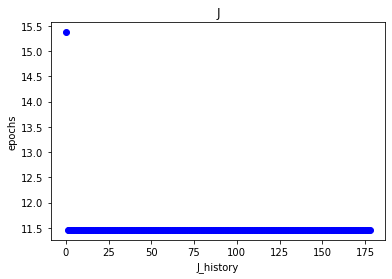

In [60]:
import matplotlib.pyplot as plt
_,ax = plt.subplots()
ax.set_title("J")
ax.set_xlabel("J_history")
ax.set_ylabel("epochs")
ax.scatter(np.arange(epoch),J, color = "b")

Далее